In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
fair_df = pd.read_csv('../fairness_df.csv', index_col = [0,1])
fair_df = fair_df.reset_index()
fair_df

,level_0,level_1,accuracy_range,max_parity_ratio,equalized_odds_diff,overall_accuracy,FPR,F1,recall_range,brier_score_range
0,Adult Data Set (Census),logistic_regression,0.639555,0.239503,0.290798,0.775826,0.069647,0.450571,0.290798,0.017230
1,Adult Data Set (Census),naive_bayes,0.643964,0.182976,0.300966,0.789338,0.055070,0.462681,0.300966,0.619852
2,Adult Data Set (Census),nearest_neighbors,0.614536,0.270031,0.303508,0.769561,0.081957,0.465679,0.303508,0.400351
3,Adult Data Set (Census),decision_tree,0.254532,0.214860,0.613625,0.806658,0.131843,0.760555,0.613625,0.254532
4,Adult Data Set (Census),random_forest,0.300869,0.119862,0.624301,0.852475,0.074830,0.768701,0.624301,0.189012
5,Adult Data Set (Census),multilayer_perceptron,0.453965,0.493447,0.973564,0.629284,0.480402,0.986605,0.973564,0.447146
6,Adult Data Set (Census),svm_model,0.363599,0.112712,0.571937,0.847685,0.064464,0.727684,0.571937,0.246822
7,Communities and Crime,logistic_regression,0.355386,0.323155,0.487179,0.731463,0.157434,0.655172,0.487179,0.040826
8,Communities and Crime,naive_bayes,0.539022,0.089584,0.423077,0.793587,0.037901,0.594595,0.423077,0.518928
9,Communities and Crime,nearest_neighbors,0.460305,0.275643,0.423077,0.739479,0.116618,0.594595,0.423077,0.275631


In [3]:
ranked = []
for dataset in np.unique(fair_df['level_0']):
    data_df = fair_df[fair_df['level_0'] == dataset]
    data_ranked = data_df.rank(numeric_only=True)
    
    # metrics where higher = better
    data_ranked['overall_accuracy'] = max(data_ranked['overall_accuracy']) - data_ranked['overall_accuracy'] + 1
    data_ranked['max_parity_ratio'] = max(data_ranked['max_parity_ratio']) - data_ranked['max_parity_ratio'] + 1
    
    ranked.append(pd.concat([data_df[['level_0', 'level_1']], data_ranked], axis = 1))

Adult Data Set (Census)


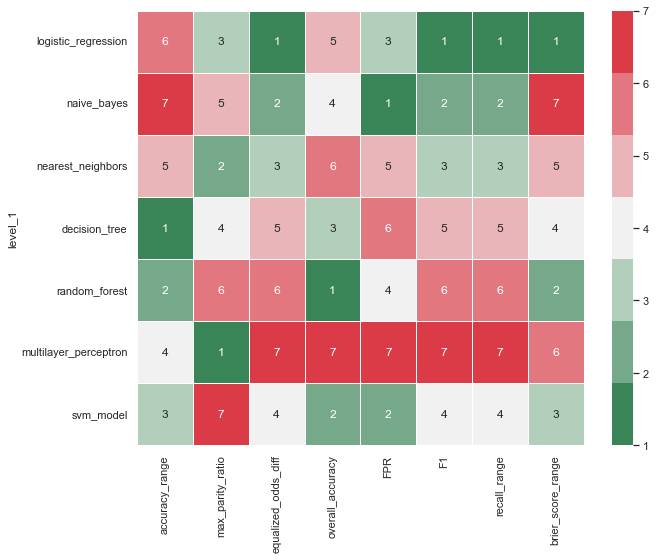

Communities and Crime


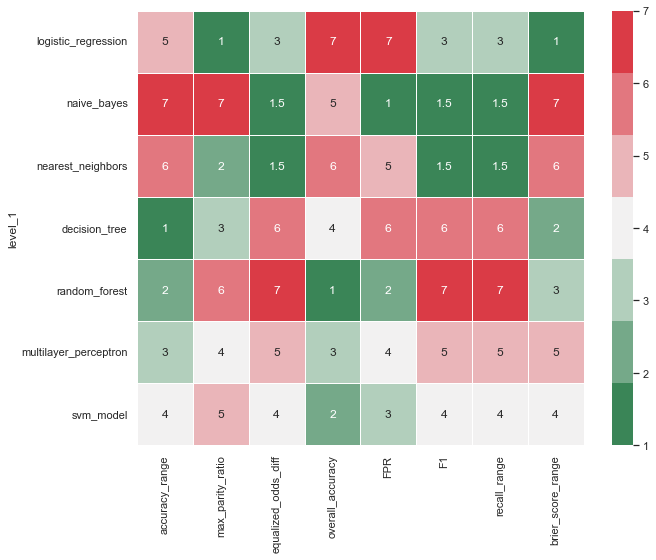

Diabetes Dataset 1999-2008


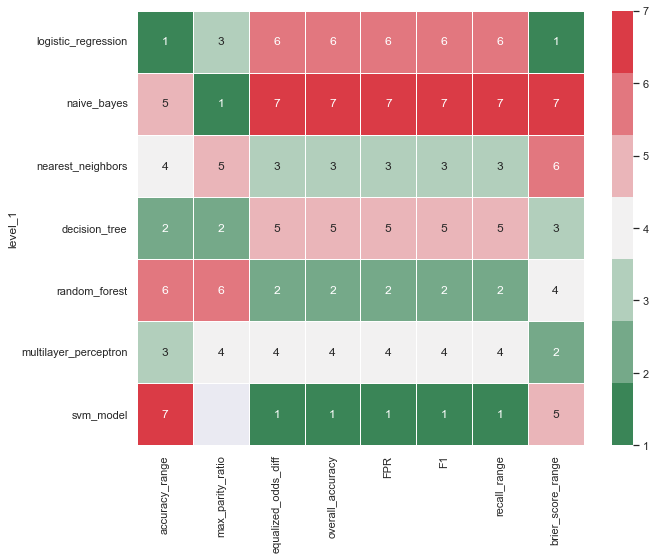

Loans Default Dataset


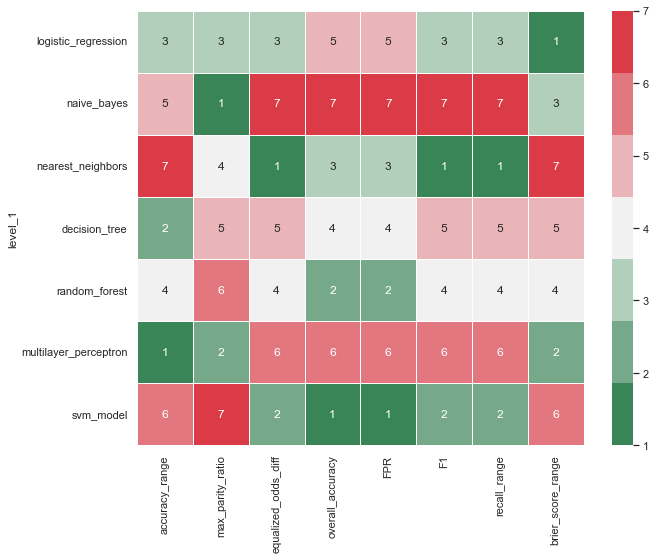

Obermeyer Health Dataset


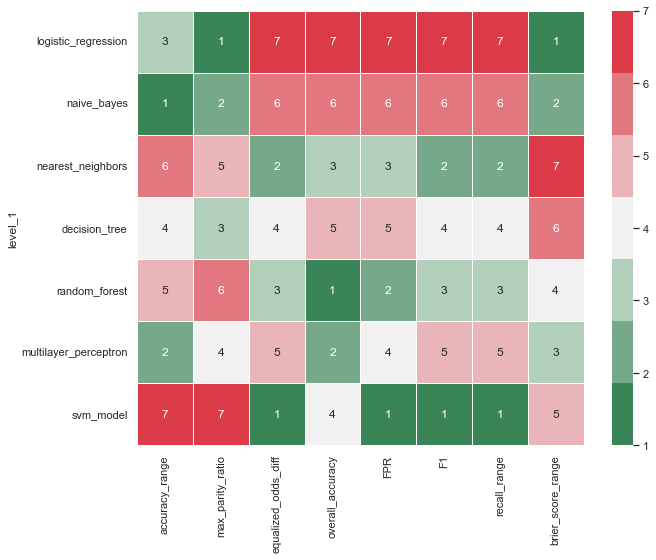

In [4]:
# Visualize ranks
for rank_df in ranked:
    dataset = rank_df['level_0'].iloc[0]
    rank_df = rank_df.drop(columns = ['level_0']).set_index('level_1')
    seaborn.set(rc = {'figure.figsize':(10,8)})
    seaborn.heatmap(rank_df, annot = True, linewidths = 0.5, cmap = seaborn.diverging_palette(140, 10, n = 7))
    print(dataset)
    plt.show()

In [5]:
# Average model rank within a dataset across metrics
for rank_df in ranked:
    dataset = rank_df['level_0'].iloc[0]
    rank_df = rank_df.drop(columns = ['level_0']).set_index('level_1')
    print('\n\n', dataset)
    print(rank_df.mean(axis = 1))



 Adult Data Set (Census)
level_1
logistic_regression      2.625
naive_bayes              3.750
nearest_neighbors        4.000
decision_tree            4.125
random_forest            4.125
multilayer_perceptron    5.750
svm_model                3.625
dtype: float64


 Communities and Crime
level_1
logistic_regression      3.7500
naive_bayes              3.9375
nearest_neighbors        3.6875
decision_tree            4.2500
random_forest            4.3750
multilayer_perceptron    4.2500
svm_model                3.7500
dtype: float64


 Diabetes Dataset 1999-2008
level_1
logistic_regression      4.375000
naive_bayes              6.000000
nearest_neighbors        3.750000
decision_tree            4.000000
random_forest            3.250000
multilayer_perceptron    3.625000
svm_model                2.428571
dtype: float64


 Loans Default Dataset
level_1
logistic_regression      3.250
naive_bayes              5.500
nearest_neighbors        3.375
decision_tree            4.375
random_forest

In [6]:
# for each model, average of average metric ranks across datasets
full_rank_df = pd.concat(ranked, axis = 0)
full_rank_df.groupby(['level_1']).mean().mean(axis = 1)

level_1
decision_tree            4.2250
logistic_regression      3.8000
multilayer_perceptron    4.3500
naive_bayes              4.7125
nearest_neighbors        3.7125
random_forest            3.7750
svm_model                3.4125
dtype: float64

<AxesSubplot:>

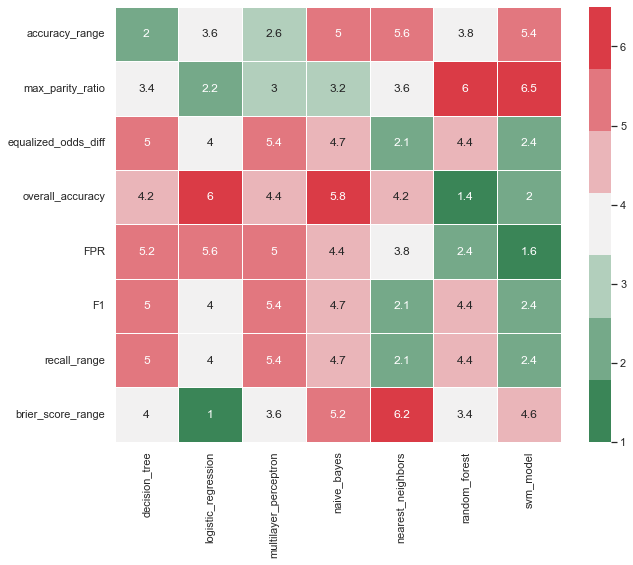

In [7]:
model_mean_ranks = {}
for model in np.unique(full_rank_df['level_1']):
    subset = full_rank_df[full_rank_df['level_1'] == model]
    model_mean_ranks[model] = (subset.drop(columns = ['level_0', 'level_1']).apply(np.mean).to_dict())
pd.DataFrame(model_mean_ranks)
seaborn.heatmap(pd.DataFrame(model_mean_ranks), cmap = seaborn.diverging_palette(140, 10, n = 7), annot = True, linewidths = 0.5)

<AxesSubplot:>

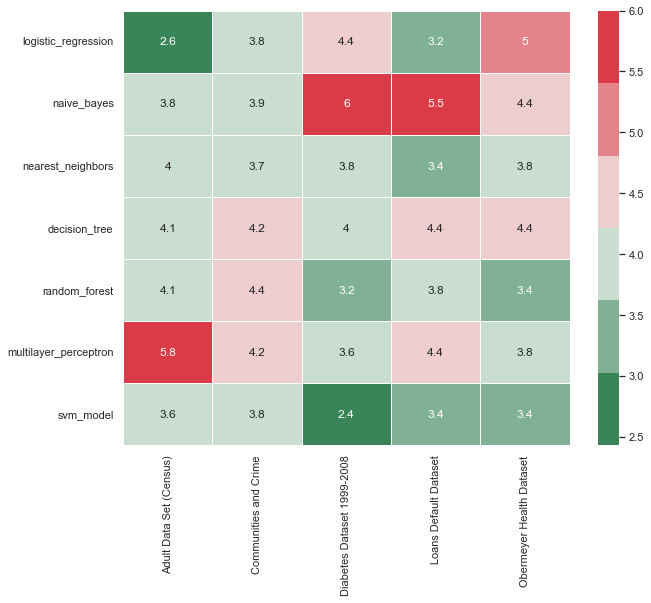

In [8]:
dataset_model_ranks = {}
for dataset in np.unique(full_rank_df['level_0']):
    subset = full_rank_df[full_rank_df['level_0'] == dataset]
    dataset_model_ranks[dataset] = subset.drop(columns = ['level_0']).set_index('level_1', drop = True).mean(axis = 1).to_dict()
seaborn.heatmap(pd.DataFrame(dataset_model_ranks), cmap = seaborn.diverging_palette(140, 10), annot = True, linewidths = 0.5)

<AxesSubplot:>

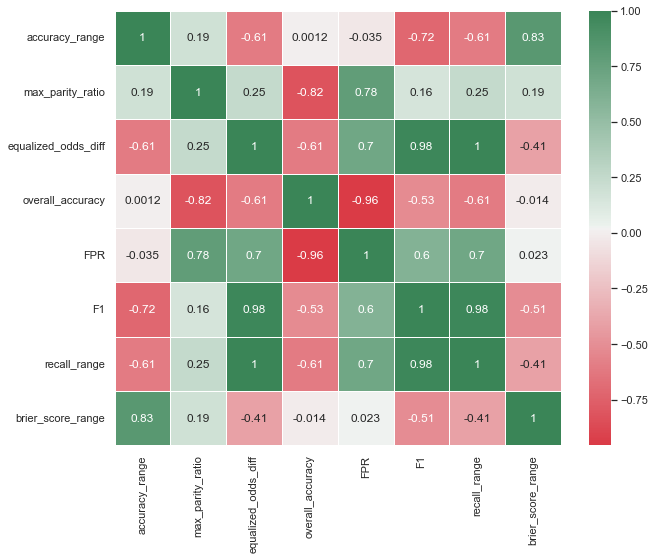

In [11]:
seaborn.heatmap(fair_df.drop(columns = ['level_0', 'level_1']).corr(),
                cmap = seaborn.diverging_palette(10, 140, n = 1000), annot = True, linewidths = 0.5)